In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [ ]:
import altair as alt
alt.renderers.enable('notebook')

In [ ]:
suicide = pd.read_csv("data/male-and-female-suicide-rate.csv")

In [ ]:
suicide.head(5)

In [ ]:
suicide['Entity'].drop_duplicates();
suicide['Year'].drop_duplicates().sort_values();

`suicide[suicide['Entity'] == 'West Germany']` How to store data so that pandas implement to manipulate data in this way?

In [ ]:
suicide[suicide['Year']== 2004].loc[:, [suicide.columns[0], suicide.columns[3], suicide.columns[4]]][:2];
suicide[suicide['Entity'] == 'West Germany'].sort_values('Year')[:5];
suicide['suicide rate (per 100,000))'] = suicide[suicide.columns[3]] + suicide[suicide.columns[4]] 

In [ ]:
suicide.columns
suicide[suicide['Entity'] == 'West Germany'].sort_values(['Year'])[:5];
suicide.sort_values(['Year', suicide.columns[-1]], ascending=[True, False])[:10];

In [ ]:
#suicide.style
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 10 else 'black'
    return 'color: %s' % color 
color_negative_red(10.1)

suicide.sort_values(['Year', suicide.columns[-1]], ascending=[True, False])[:5].style.applymap\
(color_negative_red, subset = pd.IndexSlice[:, suicide.columns[-1]])

In [ ]:
colIndex = suicide.columns

In [ ]:
source = suicide[suicide['Entity'] == 'Japan'].loc[:, [colIndex[2], colIndex[-1]]]
source

In [ ]:
bars = alt.Chart(source).mark_bar().encode(
    x='suicide rate (per 100,000)):Q',
    y="Year:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='suicide rate (per 100,000)):Q' 
)

(bars + text).properties(height=800)

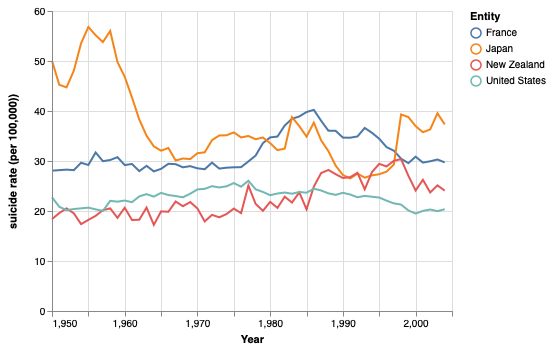

In [18]:
source = suicide[(suicide['Entity'] == 'Japan') | (suicide['Entity'] == 'France') | \
                 (suicide['Entity'] == 'United States') | (suicide['Entity'] == 'New Zealand')].loc[:, [colIndex[0], colIndex[2], colIndex[-1]]]
alt.Chart(source).mark_line().encode(
    x=colIndex[2],
    y=colIndex[-1],
    color=colIndex[0],
)

In [ ]:
highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)

base = alt.Chart(source).encode(
    x=colIndex[2],
    y=colIndex[-1],
    color=colIndex[0],
)

points = base.mark_circle().encode(
    opacity=alt.value(2)
).add_selection(
    highlight
).properties(
    width = 400
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)
points + lines